In [1]:
!pip install dask_cuda dask-cudf-cu12

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.9 MB/s eta 0:00:00
  Created wheel for dask-cudf-cu12: filename=dask_cudf_cu12-24.10.1-py3-none-any.whl size=56338 sha256=9f04be126ffc5921298c51d2888572ac0e31ac77a9dd67920ecec1a1b40978e8
  Stored in directory: /root/.cache/pip/wheels/b7/05/59/0d55b227cfca7b05a1a5390a984abd3c7bfda2c39511a08ae3
Successfully built dask-cudf-cu12
  Attempting uninstall: dask
    Found existing installation: dask 2024.10.0
    Unin

In [2]:
!pip install polars[gpu] -U --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of cudf-polars-cu12 to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.5/32.5 MB 61.6 MB/s eta 0:00:00
  Created wheel for cudf-polars-cu12: filename=cudf_polars_cu12-24.10.1-py3-none-any.whl size=53357 sha256=3aeb03d20bbf944106c86e22714437316148c86f659d9e691bf2a11cccbae8f5
  Stored in directory: /root/.cache/pip/wheels/0b/60/a0/e6aa0053e52d34019bf87cb78f0215e71499afd0ca060b43f5
Successfully built cudf-polars-cu12
  Attempting uninstall: polars
    Found existing installation: polars 1.9.0
    Uninstalling polars-1.9.0:
      Successfully uninstalled polars-1.9.0


# CuPy

In [ ]:
import cupy as cp
import numpy as np

user - время, затраченное на сами вычисления

sys - время, затраченное всеми процессорами на выполнение связанных с системой задач, таких как выделение памяти, например.

In [ ]:
np_array = np.random.random_sample(5000000)
cp_array = cp.random.random_sample(5000000)

In [ ]:
%time np_array.mean()

CPU times: user 4.32 ms, sys: 0 ns, total: 4.32 ms
Wall time: 26 ms


0.49999160483001964

In [ ]:
%time np_array.sum()

CPU times: user 4.68 ms, sys: 0 ns, total: 4.68 ms
Wall time: 5.98 ms


2499958.024150098

In [ ]:
%time cp_array.mean()

CPU times: user 297 µs, sys: 65 µs, total: 362 µs
Wall time: 369 µs


array(0.50024896)

In [ ]:
%time cp_array.sum()

CPU times: user 157 µs, sys: 35 µs, total: 192 µs
Wall time: 197 µs


array(2501244.77937832)

In [ ]:
def logistic_numpy(y):
    return 1 / (1 + np.exp(-y))

def logistic_cupy(y):
    return 1 / (1 + cp.exp(-y))

In [ ]:
%time logistic_numpy(np_array)

CPU times: user 33.8 ms, sys: 34.5 ms, total: 68.3 ms
Wall time: 69.5 ms


array([0.63178449, 0.71441524, 0.53638437, ..., 0.50976298, 0.54514983,
       0.68429492])

In [ ]:
%time logistic_cupy(cp_array)

CPU times: user 840 µs, sys: 0 ns, total: 840 µs
Wall time: 849 µs


array([0.62305803, 0.71623883, 0.59466664, ..., 0.69513482, 0.50154361,
       0.61914303])

А можно ли написать такую функцию, чтобы она при наличии numpy массива использовала CPU, а при наличии cupy GPU?

In [ ]:
def univers_logistic(y):
    yp = cp.get_array_module(y)
    return 1 / (1 + yp.exp(y))

def universe_dot(x, y):
    xp = cp.get_array_module(y)
    return xp.dot(x, y)

In [ ]:
%time univers_logistic(np_array)

CPU times: user 47 ms, sys: 11.6 ms, total: 58.5 ms
Wall time: 57.6 ms


array([0.36821551, 0.28558476, 0.46361563, ..., 0.49023702, 0.45485017,
       0.31570508])

In [ ]:
%time univers_logistic(cp_array)

CPU times: user 280 µs, sys: 1.04 ms, total: 1.32 ms
Wall time: 1.19 ms


array([0.37694197, 0.28376117, 0.40533336, ..., 0.30486518, 0.49845639,
       0.38085697])

# Как переключать видеокарты?

Глобальное переключение

In [ ]:
cp.cuda.Device(0).use()

<CUDA Device 0>

Переключение в рамках контекстного менеджера

In [ ]:
with cp.cuda.Device(0):
    gpu_0 = cp.array([1, 2, 3, 4, 5])
with cp.cuda.Device(1):
    gpu_1 = cp.array([1, 2, 3, 4, 5])

print(f'gpu_0 device - {gpu_0.device}, gpu_1 device - {gpu_1.device}')

CUDARuntimeError: cudaErrorInvalidDevice: invalid device ordinal

Проводить операции с массивами на разных видеокартах напрямую нельзя

In [ ]:
gpu_0 + gpu_1

In [ ]:
gpu_1.device

In [ ]:
with cp.cuda.Device(0):
    gpu_1 = cp.asarray(gpu_1)
print(f'gpu_1 device - {gpu_1.device}')
gpu_0 + gpu_1

# Передать массив между CPU и GPU

In [ ]:
with cp.cuda.Device(0):
    gpu_0 = cp.array([1, 2, 3, 4, 5])

In [ ]:
gpu_0

array([1, 2, 3, 4, 5])

In [ ]:
#первый способ
x_cpu = cp.asnumpy(gpu_0)

In [ ]:
x_cpu

array([1, 2, 3, 4, 5])

In [ ]:
#второй способ
x_cpu = gpu_0.get()

In [ ]:
x_cpu

array([1, 2, 3, 4, 5])

# Собственные kernel

Тип можно указать явно, но если все типы одинаковы и могут меняться, то указывается тип T, который будет определен компилятором

In [ ]:
cupy.ElementwiseKernel(in_params, # входные параметры
                       out_params, # выходные параметры
                       operation, # тело цикла, напианное на CUDA-C/C++
                       name=u'kernel', # имя функции ядра
                       reduce_dims=True, # если False, то формы массивов сохраняются. Иначе размерности уменьшаются до минимума
                                         # и это позволяет ускорять функции
                       preamble=u'', # фрагмент кода CUDA-C / C++, вставляемый в верхнюю часть файла cu
                       no_return=False, # метод __call__ ничего не возвращает если True
                       return_tuple=False, # если True, то всегда возвращается tuple, даже если 1 елемент
                       **kwargs)

NameError: name 'cupy' is not defined

In [ ]:
squared_diff = cp.ElementwiseKernel(
    in_params='float32 x, float32 y',
    out_params='float32 z',
    operation='z = (x - y) * (x - y)',
    name='squared_diff')

In [ ]:
x = cp.arange(10, dtype=np.float32).reshape(2, 5)
squared_diff(x, 5)

array([[25., 16.,  9.,  4.,  1.],
       [ 0.,  1.,  4.,  9., 16.]], dtype=float32)

In [ ]:
#Можно передать массив, в который записывается результат
z = cp.empty((2, 5), dtype=np.float32)
squared_diff(x, 5, z)

array([[25., 16.,  9.,  4.,  1.],
       [ 0.,  1.,  4.,  9., 16.]], dtype=float32)

In [ ]:
cupy.ReductionKernel(in_params, # входные параметры
                     out_params, # выходные параметры
                     map_expr, # map операция для входных значений
                     reduce_expr, # reduce операция для входных значений
                     post_map_expr, # map операция для взначений после reduce операции
                     identity, #значение идентификатора для начала reduce операций
                     name=u'reduce_kernel',
                     reduce_type=None,
                     reduce_dims=True,
                     preamble=u'',
                     options=() # дополнительные опции для компиляции
                    )

In [ ]:
l2norm_kernel = cp.ReductionKernel(
    'T x',  # input params
    'T y',  # output params
    'x * x',  # map
    'a + b',  # reduce
    'y = sqrt(a)',  # post-reduction map
    '0',  # identity value
    'l2norm'  # kernel name
)
x = cp.arange(10, dtype=np.float32).reshape(2, 5)
l2norm_kernel(x, axis=1)

array([ 5.477226 , 15.9687195], dtype=float32)

cp.RawKernel для кода на CUDA source code

ElementwiseKernel и ReductionKernel могут быть написаны проще через декоратор @cp.fuse()

In [ ]:
@cp.fuse()
def squared_diff_dec(x, y):
    return (x - y) * (x - y)

squared_diff_dec(x, 5)

array([[25., 16.,  9.,  4.,  1.],
       [ 0.,  1.,  4.,  9., 16.]], dtype=float32)

In [ ]:
@cp.fuse()
def l2norm_dec(x):
    return cp.sqrt(cp.sum(cp.power(x, 2), axis=1))

l2norm_dec(x)

array([ 5.477226 , 15.9687195], dtype=float32)

In [ ]:
%timeit squared_diff(x, 5)

15.7 µs ± 2.05 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%timeit (x - 5) * (x - 5)

98.3 µs ± 47.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit squared_diff_dec(x, 5)

17.7 µs ± 1.98 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%timeit l2norm_kernel(x, axis=1)

23 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%timeit cp.sqrt(cp.sum(cp.power(x, 2), axis=1))

68.1 µs ± 926 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%timeit l2norm_dec(x)

26.4 µs ± 1.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# CuDF

In [ ]:
import cudf
import cupy as cp

import pandas as pd
import numpy as np

О датасете:
    
База данных системы эпиднадзора за случаями заболевания COVID-19 включает данные, сообщаемые штатами США и автономными отчетными органами, включая Нью-Йорк и округ Колумбия (округ Колумбия).

https://www.kaggle.com/arashnic/covid19-case-surveillance-public-use-dataset

current_status - текущий статус человека, sex - пол, age_group - возростная группа, Race and ethnicity (combined) - демографическая группа, hosp_yn - был ли пациент госпитализирован, icu_yn - был ли пациент госпитализирован в отделение интенсивной терапии,
death_yn - умер ли пациент от болезни, medcond_yn - были ли какие-то сопутствующие заболевания или риск-факторы?

In [ ]:
%time df = pd.read_parquet('covid.gzip')

CPU times: user 3.21 s, sys: 1.16 s, total: 4.37 s
Wall time: 4.05 s


In [ ]:
df

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
...,...,...,...,...,...,...,...,...
8405074,Probable Case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing
8405075,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405076,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405077,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing


In [ ]:
%time df.isna().sum()

CPU times: user 2.63 s, sys: 18 ms, total: 2.64 s
Wall time: 2.63 s


,0
current_status,0
sex,18
age_group,89
Race and ethnicity (combined),7
hosp_yn,0
icu_yn,0
death_yn,0
medcond_yn,0


In [ ]:
%time df = df.dropna()

CPU times: user 3.02 s, sys: 318 ms, total: 3.34 s
Wall time: 3.33 s


Из-за сложного управления памятью GPU в cuDF первая загрузка данных в новую среду памяти RAPIDS иногда значительно медленнее, чем последующие загрузки. Диспетчер памяти RAPIDS готовит дополнительную память для размещения массивов, которые вы можете использовать с данными, вместо того чтобы многократно выделять и освобождать память на протяжении всего рабочего процесса.
Другими словами, как и в большинсвте случаев, память надо "прогреть".

In [ ]:
%time gdf = cudf.read_parquet('covid.gzip')

CPU times: user 389 ms, sys: 7.38 ms, total: 396 ms
Wall time: 406 ms


In [ ]:
%time gdf.isna().sum()

CPU times: user 11.3 ms, sys: 2.03 ms, total: 13.4 ms
Wall time: 12.4 ms


current_status                    0
sex                              18
age_group                        89
Race and ethnicity (combined)     7
hosp_yn                           0
icu_yn                            0
death_yn                          0
medcond_yn                        0
dtype: int64

In [ ]:
%time gdf = gdf.dropna()

CPU times: user 10.9 ms, sys: 2.99 ms, total: 13.9 ms
Wall time: 13 ms


In [ ]:
gdf

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
...,...,...,...,...,...,...,...,...
8405074,Probable Case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing
8405075,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405076,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405077,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing


Давайте измерим время фильтрации датасета. Большая часть времени тратится на выполнение системных операций, таких как выделение памяти, например. А вот само время, затраченное на вычисления очень мало.

In [ ]:
%time male_df = df.loc[df['sex']=='Male']

CPU times: user 776 ms, sys: 116 ms, total: 892 ms
Wall time: 873 ms


In [ ]:
%time male_gdf = gdf.loc[gdf['sex']=='Male']

CPU times: user 49.3 ms, sys: 9.12 ms, total: 58.5 ms
Wall time: 99.2 ms


А теперь давайте посмотрим на то, как распределены данные по возрастам

In [ ]:
%time df['age_group'].value_counts(normalize=True)

CPU times: user 411 ms, sys: 3.55 ms, total: 414 ms
Wall time: 408 ms


,proportion
age_group,
20 - 29 Years,0.194559
30 - 39 Years,0.163310
40 - 49 Years,0.150785
50 - 59 Years,0.146043
60 - 69 Years,0.102708
10 - 19 Years,0.100113
70 - 79 Years,0.057548
80+ Years,0.045553
0 - 9 Years,0.035579


In [ ]:
%time gdf['age_group'].value_counts(normalize=True)

CPU times: user 18.9 ms, sys: 4.1 ms, total: 23 ms
Wall time: 22 ms


age_group
20 - 29 Years    0.194559
30 - 39 Years    0.163310
40 - 49 Years    0.150785
50 - 59 Years    0.146043
60 - 69 Years    0.102708
10 - 19 Years    0.100113
70 - 79 Years    0.057548
80+ Years        0.045553
0 - 9 Years      0.035579
Unknown          0.003802
Name: proportion, dtype: float64

А как сочетать в себе cupy и cudf?

In [ ]:
%time non_hisp_30_df = df.loc[np.logical_and(df['Race and ethnicity (combined)'].str.endswith('Non-Hispanic'),\
                                             df['age_group'].str.startswith('30'))]

CPU times: user 4.13 s, sys: 116 ms, total: 4.25 s
Wall time: 4.16 s


In [ ]:
%time non_hisp_30_gdf = gdf.loc[cp.logical_and(gdf['Race and ethnicity (combined)'].str.endswith('Non-Hispanic'),\
                                               gdf['age_group'].str.startswith('30'))]

CPU times: user 19.4 ms, sys: 2.97 ms, total: 22.3 ms
Wall time: 22.3 ms


Группировка данных

In [ ]:
df

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
...,...,...,...,...,...,...,...,...
8405074,Probable Case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing
8405075,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405076,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405077,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing


In [ ]:
df['death_yn'].value_counts()

,count
death_yn,
No,3690765
Missing,3486890
Unknown,1043765
Yes,183570


Давайте создадим новую переменную, которая ставит индикатор выздоровления всегда, даже когда информации нет

In [ ]:
df['death_ind'] = df['death_yn'].apply(lambda x: 1 if x=='Yes' else 0)

In [ ]:
gdf['death_ind'] = gdf['death_yn'].apply(lambda x: 1 if x=='Yes' else 0)

Давайте посмотрим, есть ли различие в вероятности смерти, если есть осложения

In [ ]:
gdf['death_ind'].mean()

0.021840597073881113

In [ ]:
%time df[['medcond_yn', 'death_ind']].groupby(['medcond_yn']).mean()

CPU times: user 582 ms, sys: 181 ms, total: 763 ms
Wall time: 746 ms


,death_ind
medcond_yn,
Missing,0.013737
No,0.005042
Unknown,0.032504
Yes,0.088406


In [ ]:
%time gdf[['medcond_yn', 'death_ind']].groupby(['medcond_yn']).mean()

CPU times: user 18.7 ms, sys: 4.1 ms, total: 22.8 ms
Wall time: 19.3 ms


,death_ind
medcond_yn,
Missing,0.013737
No,0.005042
Unknown,0.032504
Yes,0.088406


## Кстати

Можно писать собственные udf через numba

In [ ]:
from cudf.datasets import randomdata

df = randomdata(nrows=10, dtypes={'a':float, 'b':float, 'c':str}, seed=12)
df.head()

,a,b,c
0,-0.691674,-0.432343,Ursula
1,0.480099,0.212166,George
2,-0.473370,0.888450,Norbert
3,0.067479,0.705471,Jerry
4,-0.970850,-0.995482,Norbert


In [ ]:
from numba import cuda

@cuda.jit
def multiply(in_col, out_col, multiplier):
    i = cuda.grid(1)
    if i < in_col.size:
        out_col[i] = in_col[i] * multiplier

In [ ]:
size = len(df['a'])
df['e'] = 0.0
multiply.forall(size)(df['a'], df['e'], 3.0)
df

/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


,a,b,c,e
0,-0.691674,-0.432343,Ursula,-2.075023
1,0.480099,0.212166,George,1.440298
2,-0.473370,0.888450,Norbert,-1.420110
3,0.067479,0.705471,Jerry,0.202436
4,-0.970850,-0.995482,Norbert,-2.912550
5,0.837494,0.042452,Quinn,2.512482
6,0.801430,0.104075,Alice,2.404289
7,-0.933157,-0.029245,Oliver,-2.799471
8,0.913899,0.536268,Zelda,2.741696
9,-0.725581,-0.678566,Yvonne,-2.176744


В сuDF есть хорший метод apply_rows, который позволяет писать udf на python и применять к нескольким столбцам

In [ ]:
def conditional_add(x, y, out):
    for i, (a, e) in enumerate(zip(x, y)):
        if a > 0:
            out[i] = a + e
        else:
            out[i] = a

In [ ]:
df = df.apply_rows(conditional_add,
                   incols={'a':'x', 'b':'y'},
                   outcols={'out': np.float64},
                   kwargs={}
                  )
df

,a,b,c,e,out
0,-0.691674,-0.432343,Ursula,-2.075023,-0.691674
1,0.480099,0.212166,George,1.440298,0.692266
2,-0.473370,0.888450,Norbert,-1.420110,-0.473370
3,0.067479,0.705471,Jerry,0.202436,0.772950
4,-0.970850,-0.995482,Norbert,-2.912550,-0.970850
5,0.837494,0.042452,Quinn,2.512482,0.879946
6,0.801430,0.104075,Alice,2.404289,0.905505
7,-0.933157,-0.029245,Oliver,-2.799471,-0.933157
8,0.913899,0.536268,Zelda,2.741696,1.450167
9,-0.725581,-0.678566,Yvonne,-2.176744,-0.725581


# Dask-Cudf

In [ ]:
from dask_cuda import LocalCUDACluster
from dask.distributed import Client, progress
import dask_cudf
import cudf
import dask.dataframe as dd

In [ ]:
cluster = LocalCUDACluster(dashboard_address=':8902')
client = Client(cluster)
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:36165
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8902/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42715'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:37063', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37063
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:38420
INFO:distributed.scheduler:Receive client connection: Client-85e2e613-9d29-11ef-820e-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:38426


Connection method: Cluster object,Cluster type: dask_cuda.LocalCUDACluster
Dashboard: http://127.0.0.1:8902/status,
Dashboard: http://127.0.0.1:8902/status,Workers: 1
Total threads: 1,Total memory: 12.67 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36165,Workers: 1
Dashboard: http://127.0.0.1:8902/status,Total threads: 1
Started: Just now,Total memory: 12.67 GiB
Comm: tcp://127.0.0.1:37063,Total threads: 1
Dashboard: http://127.0.0.1:37423/status,Memory: 12.67 GiB
Nanny: tcp://127.0.0.1:42715,


В dask-cudf применяются ленивые вычисления. То есть мы что-то делаем только тогда, когда это необходимо, например, если вы просите вернуть какой-то ответ.

In [ ]:
%time ddf = dask_cudf.read_parquet('covid.gzip')
ddf

CPU times: user 44 ms, sys: 8.19 ms, total: 52.2 ms
Wall time: 51.1 ms


,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
npartitions=1,,,,,,,,
,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...


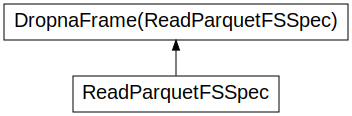

In [ ]:
gdf = ddf.dropna()
gdf.visualize(format='svg')

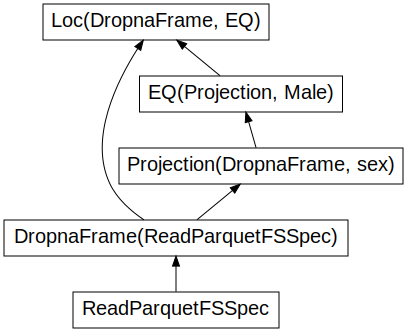

In [ ]:
male_gdf = gdf.loc[gdf['sex']=='Male']
male_gdf.visualize(format='svg')

А что если я хочу, чтобы уже что-то посчиталось предварительно, пока я буду дальше код писать?

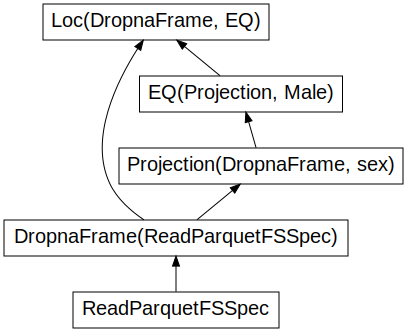

In [ ]:
copy_male_gdf = male_gdf.copy()
copy_male_gdf.visualize(format='svg')

А что если я хочу, чтобы уже что-то посчиталось предварительно, пока я буду дальше код писать?

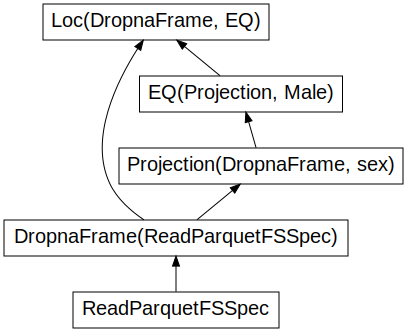

In [ ]:
copy_male_gdf = male_gdf.copy()
copy_male_gdf.visualize(format='svg')

Строчкой ниже мы попросили посчитать все и положить это в память. Действие особенно полезно при использовании распределенных систем,
поскольку результаты будут храниться в распределенной памяти, а не возвращаться в один локальный процесс

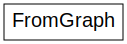

In [ ]:
copy_male_gdf = copy_male_gdf.persist()
copy_male_gdf.visualize(format='svg')

Выполнили compute = сложили данные на одну видеокарту и тип данных уже cudf

In [ ]:
%time male_gdf.compute()

AttributeError: DataFrame object has no attribute compute

In [ ]:
male_gdf = male_gdf.compute()
male_gdf['age_group'].value_counts() / male_gdf.shape[0]

age_group
20 - 29 Years    0.191633
30 - 39 Years    0.165641
40 - 49 Years    0.151239
50 - 59 Years    0.148654
60 - 69 Years    0.106568
10 - 19 Years    0.100292
70 - 79 Years    0.058702
0 - 9 Years      0.038190
80+ Years        0.035535
Unknown          0.003546
Name: count, dtype: float64

### В целом все очень похоже на cudf. Но еще пара моментов

In [ ]:
from cudf.datasets import randomdata

df = randomdata(nrows=10, dtypes={'a':float, 'b':float}, seed=12)
df.mean()

a   -0.069423
b    0.035325
dtype: float64

Перевод из cudf в dask-cudf

In [ ]:
ddf = dask_cudf.from_cudf(df, npartitions=2)
type(ddf)

dask_cudf.expr._collection.DataFrame

In [ ]:
ddf.mean().compute()

a   -0.069423
b    0.035325
dtype: float64

В dask-cudf пока нельзя применять метод apply к отдельному столбцу напрямую, можно только к каждой партиции через map_partitions.

In [ ]:
def add_ten(num):
    return num + 10

ddf['a'].map_partitions(add_ten).compute()

0     9.308326
1    10.480099
2     9.526630
3    10.067479
4     9.029150
5    10.837494
6    10.801430
7     9.066843
8    10.913899
9     9.274419
Name: a, dtype: float64

Транспонировать партицированные данные пока тоже нельзя, придется сначала выполнить медот compute(), но если в одну видеокарту не влезет, то не выйдет (( А еще если есть переменные типа string, то также не выйдет транспонировать

In [ ]:
ddf.T

AttributeError: 'DataFrame' object has no attribute 'T'

In [ ]:
ddf.compute().T

,0,1,2,3,4,5,6,7,8,9
a,-0.691674,0.480099,-0.47337,0.067479,-0.970850,0.837494,0.801430,-0.933157,0.913899,-0.725581
b,-0.432343,0.212166,0.88845,0.705471,-0.995482,0.042452,0.104075,-0.029245,0.536268,-0.678566


# Polars

In [1]:
import polars as pl

Тут нет GPU вычислений

In [2]:
df_pl = pl.read_parquet('covid.gzip')

In [3]:
df_pl

current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
str,str,str,str,str,str,str,str
"""Laboratory-confirmed case""","""Male""","""10 - 19 Years""","""Black, Non-Hispanic""","""No""","""Unknown""","""No""","""No"""
"""Laboratory-confirmed case""","""Male""","""10 - 19 Years""","""Black, Non-Hispanic""","""No""","""No""","""No""","""No"""
"""Laboratory-confirmed case""","""Male""","""10 - 19 Years""","""Black, Non-Hispanic""","""No""","""No""","""No""","""No"""
"""Laboratory-confirmed case""","""Male""","""10 - 19 Years""","""Black, Non-Hispanic""","""Missing""","""Missing""","""No""","""Missing"""
"""Laboratory-confirmed case""","""Male""","""10 - 19 Years""","""Black, Non-Hispanic""","""No""","""No""","""No""","""Yes"""
…,…,…,…,…,…,…,…
"""Probable Case""","""Missing""","""30 - 39 Years""","""Unknown""","""No""","""Unknown""","""No""","""Missing"""
"""Laboratory-confirmed case""","""Missing""","""30 - 39 Years""","""Unknown""","""Missing""","""Missing""","""Missing""","""Missing"""
"""Laboratory-confirmed case""","""Missing""","""30 - 39 Years""","""Unknown""","""Missing""","""Missing""","""Missing""","""Missing"""


А вот тут уже есть потенциал для работы с GPU

In [4]:
df_pl = pl.scan_parquet('covid.gzip')

In [5]:
df_pl

CPU

In [6]:
df_pl.head(5).collect()

current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
str,str,str,str,str,str,str,str
"""Laboratory-confirmed case""","""Male""","""10 - 19 Years""","""Black, Non-Hispanic""","""No""","""Unknown""","""No""","""No"""
"""Laboratory-confirmed case""","""Male""","""10 - 19 Years""","""Black, Non-Hispanic""","""No""","""No""","""No""","""No"""
"""Laboratory-confirmed case""","""Male""","""10 - 19 Years""","""Black, Non-Hispanic""","""No""","""No""","""No""","""No"""
"""Laboratory-confirmed case""","""Male""","""10 - 19 Years""","""Black, Non-Hispanic""","""Missing""","""Missing""","""No""","""Missing"""
"""Laboratory-confirmed case""","""Male""","""10 - 19 Years""","""Black, Non-Hispanic""","""No""","""No""","""No""","""Yes"""


GPU

In [7]:
gpu_engine = pl.GPUEngine(
    device=0,
    raise_on_fail=True #Упадет, если нельзя сделать расчет на GPU
)

In [8]:
df_pl.head(5).collect(engine=gpu_engine)

current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
str,str,str,str,str,str,str,str
"""Laboratory-confirmed case""","""Male""","""10 - 19 Years""","""Black, Non-Hispanic""","""No""","""Unknown""","""No""","""No"""
"""Laboratory-confirmed case""","""Male""","""10 - 19 Years""","""Black, Non-Hispanic""","""No""","""No""","""No""","""No"""
"""Laboratory-confirmed case""","""Male""","""10 - 19 Years""","""Black, Non-Hispanic""","""No""","""No""","""No""","""No"""
"""Laboratory-confirmed case""","""Male""","""10 - 19 Years""","""Black, Non-Hispanic""","""Missing""","""Missing""","""No""","""Missing"""
"""Laboratory-confirmed case""","""Male""","""10 - 19 Years""","""Black, Non-Hispanic""","""No""","""No""","""No""","""Yes"""


In [9]:
df_pl = df_pl.drop_nulls()

In [10]:
df_pl

In [11]:
#Важно сделать alias

male_pl = df_pl.filter(pl.col('sex')=='Male')\
               .group_by('age_group')\
               .agg(pl.col('age_group').count().alias('count'))\
               .sort(by='count', descending=True)

male_pl = male_pl.with_columns(percent=pl.col('count') / pl.col('count').sum() * 100)

In [12]:
male_pl

In [13]:
%%time

male_pl.collect()

CPU times: user 554 ms, sys: 1.3 s, total: 1.85 s
Wall time: 1.07 s


age_group,count,percent
str,u32,f64
"""20 - 29 Years""",760896,19.163293
"""30 - 39 Years""",657692,16.564083
"""40 - 49 Years""",600508,15.123895
"""50 - 59 Years""",590246,14.865444
"""60 - 69 Years""",423136,10.656751
"""10 - 19 Years""",398220,10.029237
"""70 - 79 Years""",233081,5.870184
"""0 - 9 Years""",151635,3.818953
"""80+ Years""",141096,3.553526


In [16]:
%%time

male_pl.collect(engine=gpu_engine)

CPU times: user 434 ms, sys: 350 µs, total: 434 ms
Wall time: 421 ms


age_group,count,percent
str,u32,f64
"""20 - 29 Years""",760896,19.163293
"""30 - 39 Years""",657692,16.564083
"""40 - 49 Years""",600508,15.123895
"""50 - 59 Years""",590246,14.865444
"""60 - 69 Years""",423136,10.656751
"""10 - 19 Years""",398220,10.029237
"""70 - 79 Years""",233081,5.870184
"""0 - 9 Years""",151635,3.818953
"""80+ Years""",141096,3.553526


# Домашнее задание 1

Так как синтаксис очень похож на numpy, то ничего сложного в cupy нет.
Придумайте какую-нибудь функцию только с использованием numpy и не в одну операцию, чтобы она несла какой-то смылс. Что-то аналогичное функции из занятия l2norm_dec:

    def l2norm_dec(x):
        return cp.sqrt(cp.sum(cp.power(x, 2), axis=1))
        
Можно взять норму Фробениуса для матрицы.

Запишите эту же функцию при помощи cupy

Третья функция - cupy + декоратор @cp.fuse()

Сравните время выполнения=)

# Домашнее задание 2

Сравните среднюю вероятность смерти мужчин и женщин по группам возрастов на основе столбца death_ind. Тоже самое проделайте для вероятности госпитализации, преобразовав переменную hosp_yn, как мы сделали с переменной death_yn. 

# Домашнее задание 3

Аналогично заданию 2, но теперь при помощи dask_cudf

# Домашнее задание 4

Аналогично заданию 2, но теперь Polars c GPU